### Логистическая регрессия

1. Загрузите данные `load_wine` из `sklearn.datasets`. Из данных исключите объекты класса 2.
 Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. Обучите логистическую регрессию и оцените важность признаков. Укажите название признака, который оказался наименее значимым.

Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`



In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [3]:
Data =pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [4]:
Data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [5]:
Data = Data.drop(np.where(Data['target'] == 2)[0])

In [6]:
Data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1.0


In [7]:
X = Data[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']]
Y = Data['target']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

,features,weights
0,alcalinity_of_ash,1.181510
1,nonflavanoid_phenols,0.095000
2,hue,0.082740
3,proanthocyanins,0.057568
4,total_phenols,0.007869
5,magnesium,-0.227070
6,flavanoids,-0.302550
7,malic_acid,-0.319091
8,od280/od315_of_diluted_wines,-0.597900
9,color_intensity,-0.697629


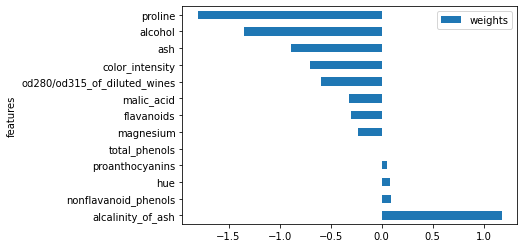

In [11]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0,)

df

Наименее значимым будет наименьший по модулю, это 'proanthocyanins'

2. Загрузите данные `load_wine` из `sklearn.datasets`. Из обучающей части исключите объекты соответствующие классу 2. Не масштабируйте признаки. Обучите логистическую регрессию с гиперпараметрами по умолчанию.
Выберите признак из предложенных, которому соответствует минимальный вес. 


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

,features,weights
0,alcohol,0.823940
1,proanthocyanins,0.516117
2,alcalinity_of_ash,0.381240
3,hue,0.295424
4,magnesium,0.032257
5,nonflavanoid_phenols,0.028490
6,total_phenols,-0.017381
7,proline,-0.019987
8,flavanoids,-0.263737
9,od280/od315_of_diluted_wines,-0.347961


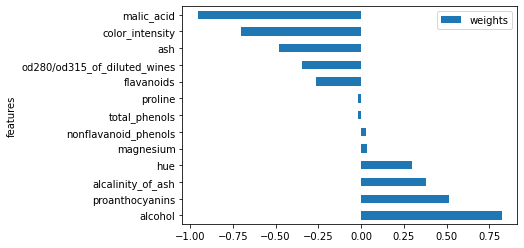

In [13]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0,)

df

Без масштабирования наименее значимым признаком оказался 'proline', хотя был наиболее значимым. 

3. Решается задача бинарной классификации. Дана матрица объекты признаки 𝑋 и ответы для объектов  𝑦. Обучите логистическую регрессию и предскажите класс объекта x_new

In [14]:
X = np.array([[1, 1], [0.3, 0.7], [0, 4], [-2, -7], [0, -2], [-1, -1], [-2, 0]])
y = np.array([1, 1, 1, 0, 0, 0, 0])
x_new = np.array([[-5, 1]])

In [15]:
clf = LogisticRegression()
clf.fit(X, y)
clf.predict(x_new)

array([0])

### Классификация текстов

4. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. Укажите полученное число признаков.


Чтобы загрузить данные, скачайте файл по ссылке. Если вы используете google colab, то пример загрузки данных приведен ниже.

In [16]:
import pandas as pd
from google.colab import files
uploder = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [17]:
Data = pd.read_table('SMSSpamCollection',header=None)
Data

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
X_train = Data.iloc[:4000][1]
X_test = Data.iloc[4000:][1]
y_train = Data.iloc[:4000][0]
y_test = Data.iloc[4000:][0]

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tf_idf = TfidfVectorizer()

def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf, 
                                  X_train, 
                                 X_test)

X_train_tfidf.shape

(4000, 7331)

7331 признаков

5.  Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, помимо слов входящих в тексты, учитывайте биграммы (используйте гиперпараметр `ngram_range`). Укажите полученное число признаков.

In [34]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2))

X_train_ngram_stem, X_test_ngram_stem = bow(vectorizer_ngram, 
                                  X_train, 
                                 X_test)

X_train_ngram_stem.shape

(4000, 39805)

39805 признаков

6. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, не учитывайте слова, которые встретились меньше 2 раз в обучающей выборке (используйте гиперпараметр `min_df`). Укажите полученное число признаков.

In [35]:
vectorizer_min = TfidfVectorizer(min_df=2)

X_train_min_stem, X_test_min_stem = bow(vectorizer_min, 
                                  X_train, 
                                 X_test)

X_train_min_stem.shape

(4000, 3377)

3377 признаков

7. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. На полученных векторных представлениях обучите логистическую регрессию и оцените долю правильных ответов на тестовой части. Укажите полученное значение доли правильных ответов.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train);

predicted = clf.predict(X_test_tfidf)
print(accuracy_score(y_test, predicted))
print(round(accuracy_score(y_test, predicted)*100,2))
        
        

0.9694656488549618
96.95
